In [2]:
import flammkuchen as fl
import cv2
import numpy as np
import os
import argparse
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
import flammkuchen as fl
import cv2
import numpy as np
import os
import argparse
from pathlib import Path
import matplotlib.pyplot as plt

def load_mask(mask_file_path):
    """
    Load the .mask file and extract mask data.
    Convert boolean masks to uint8 (0 and 255).
    """
    mask_data = fl.load(mask_file_path)

    if 'mask' not in mask_data:
        raise ValueError("Mask data not found in the file.")

    mask_array = mask_data['mask']

    # Convert boolean mask to uint8 (0 for False, 255 for True)
    mask_array = (mask_array.astype(np.uint8)) * 255

    print(f"Loaded mask of shape: {mask_array.shape} and dtype: {mask_array.dtype}")
    return mask_array

def process_video_and_mask(video_path, mask_path, output_dir):
    """
    Process an MP4 video file together with its corresponding mask.

    Args:
        video_path (str): Path to the .mp4 video file.
        mask_path (str): Path to the .mask file.
        output_dir (str): Directory to save processed frames and masks.
    """
    # Load and convert the mask
    masks = load_mask(mask_path)
    num_masks, mask_height, mask_width = masks.shape

    # Read video frames
    cap = cv2.VideoCapture(str(video_path))
    frame_idx = 0
    saved_frames_dir = Path(output_dir) / "frames"
    saved_masks_dir = Path(output_dir) / "masks"
    saved_frames_dir.mkdir(parents=True, exist_ok=True)
    saved_masks_dir.mkdir(parents=True, exist_ok=True)

    while cap.isOpened() and frame_idx < num_masks:
        ret, frame = cap.read()
        if not ret:
            print("End of video reached or error reading frame.")
            break

        # Convert to grayscale and resize to match mask dimensions
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_resized = cv2.resize(frame_gray, (mask_width, mask_height))

        # Save frame and corresponding mask
        frame_filename = saved_frames_dir / f"frame_{frame_idx:04d}.png"
        mask_filename = saved_masks_dir / f"mask_{frame_idx:04d}.png"

        cv2.imwrite(str(frame_filename), frame_resized)
        cv2.imwrite(str(mask_filename), masks[frame_idx])  # Already in uint8 format

        frame_idx += 1

    cap.release()
    print(f"Processed {frame_idx} frames. Saved to {output_dir}.")



import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def visualize_purple_overlay(frames_dir, masks_dir, output_dir, alpha=0.4, display=False):
    """
    Visualizes the mask as a purple overlay on the grayscale frame and saves the result.

    Args:
        frames_dir (str): Directory containing processed frame images.
        masks_dir (str): Directory containing processed mask images.
        output_dir (str): Directory to save overlay images.
        alpha (float): Opacity of the mask overlay (0.0 transparent - 1.0 opaque).
        display (bool): Whether to show the visualization.
    """
    frames_dir = Path(frames_dir)
    masks_dir = Path(masks_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    frame_files = sorted(frames_dir.glob("*.png"))
    mask_files = sorted(masks_dir.glob("*.png"))

    for frame_file, mask_file in zip(frame_files, mask_files):
        # Load grayscale frame and mask
        frame = cv2.imread(str(frame_file), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(str(mask_file), cv2.IMREAD_GRAYSCALE)

        if frame is None or mask is None:
            print(f"Error loading {frame_file} or {mask_file}")
            continue

        # Convert grayscale frame to BGR color space
        frame_colored = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

        # Create a purple (RGB: 128, 0, 128) mask overlay
        purple_overlay = np.zeros_like(frame_colored, dtype=np.uint8)
        purple_overlay[:, :, 0] = mask * (128 / 255)  # Blue channel
        purple_overlay[:, :, 1] = mask * (0 / 255)    # Green channel
        purple_overlay[:, :, 2] = mask * (128 / 255)  # Red channel

        # Blend the frame and the purple overlay using alpha
        overlayed_image = cv2.addWeighted(frame_colored, 1 - alpha, purple_overlay, alpha, 0)

        # Save the overlaid image
        output_filename = output_dir / f"overlay_{frame_file.stem}.png"
        cv2.imwrite(str(output_filename), overlayed_image)

        if display:
            plt.figure(figsize=(8, 4))
            plt.imshow(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Overlay of {frame_file.stem}")
            plt.axis("off")
            plt.show()

    print(f"Overlay images saved in {output_dir}")





In [11]:

mask_file = Path("../../../data/foreback/ForeBack/1DHanNE_000.mask")
mask = load_mask(mask_file)
mask
# check if True is in the mask
np.any(mask)

Loaded mask of shape: (38, 640, 480)


True

Loaded mask of shape: (38, 640, 480) and dtype: uint8
Processed 38 frames. Saved to output.


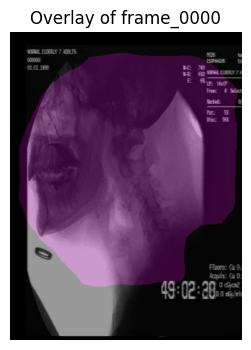

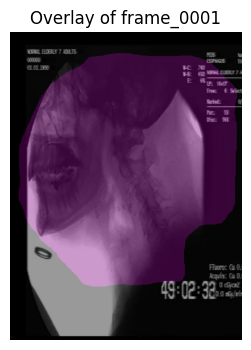

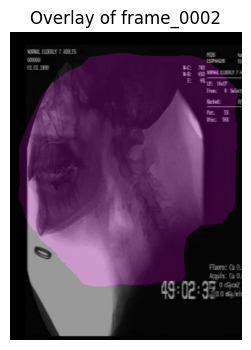

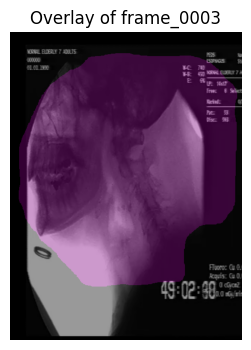

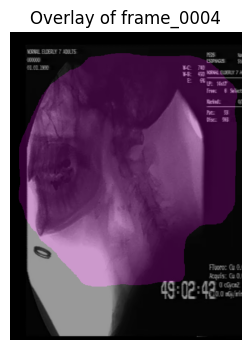

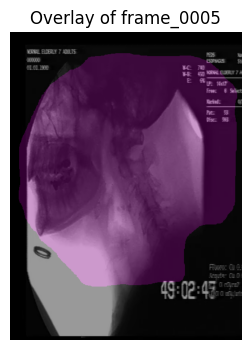

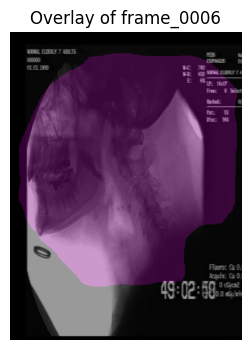

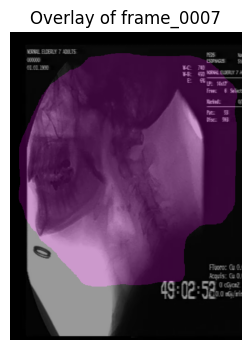

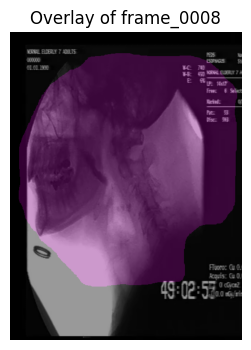

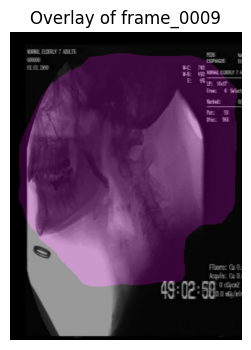

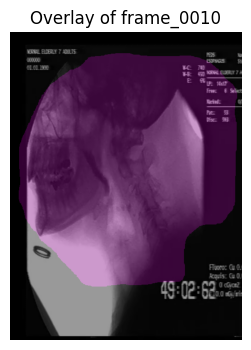

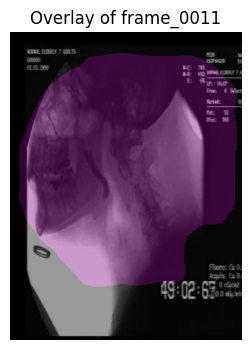

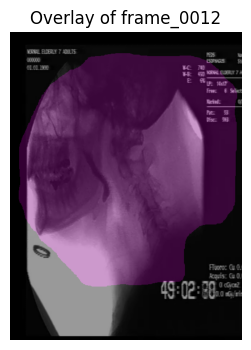

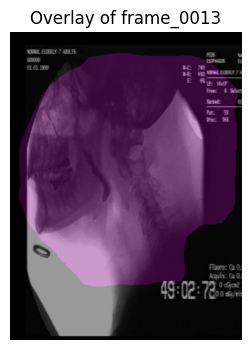

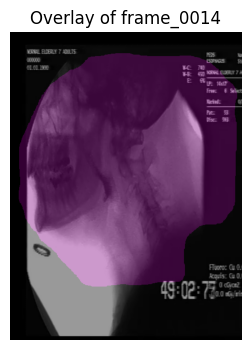

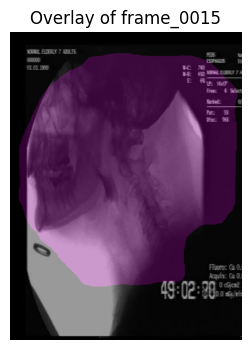

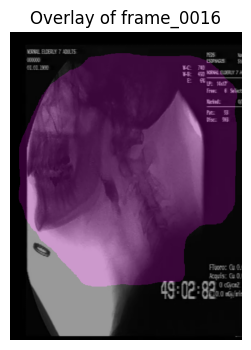

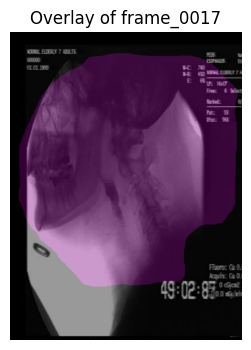

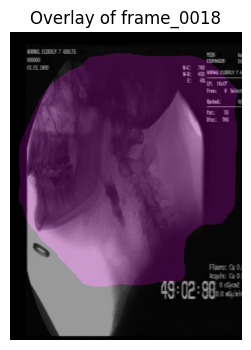

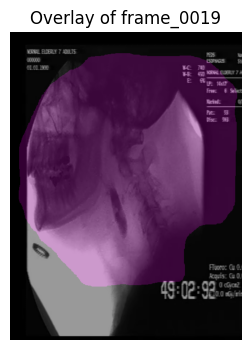

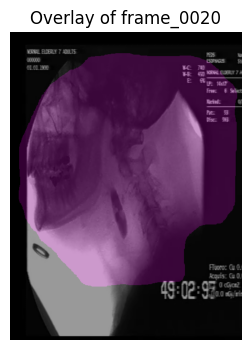

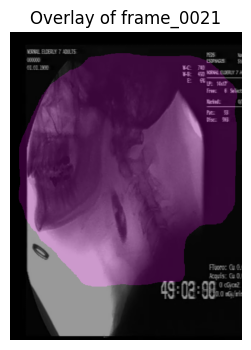

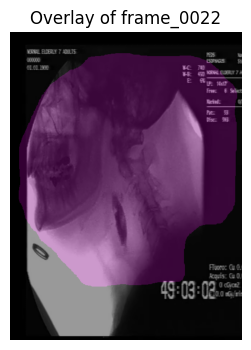

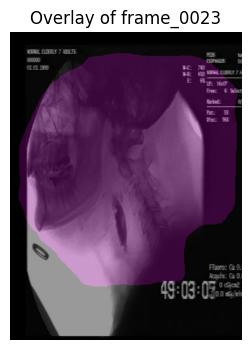

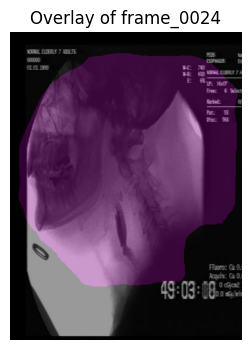

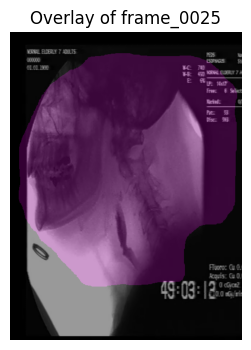

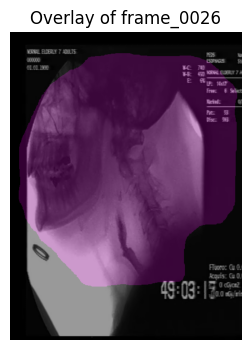

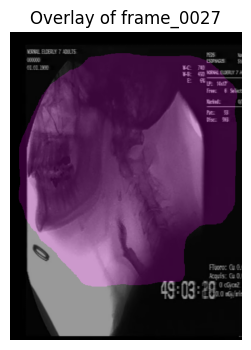

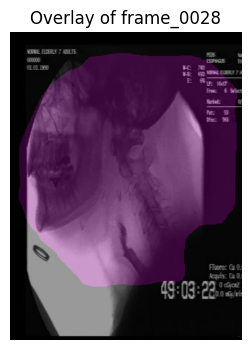

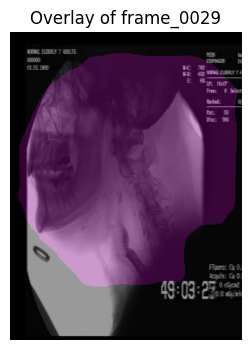

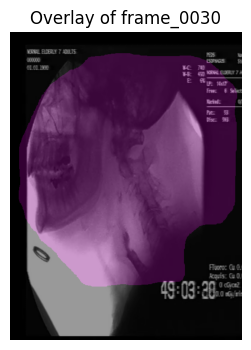

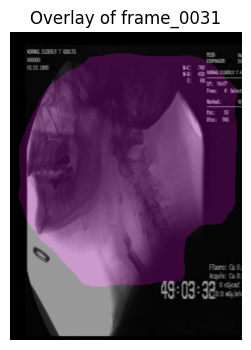

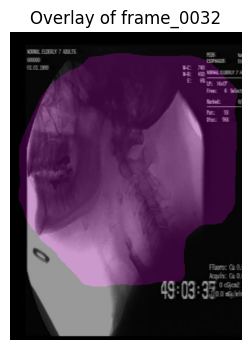

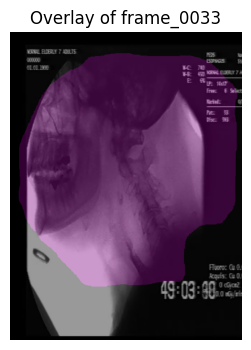

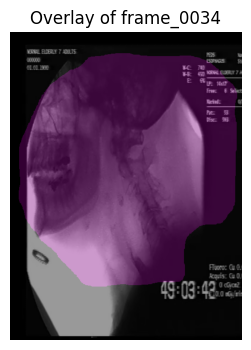

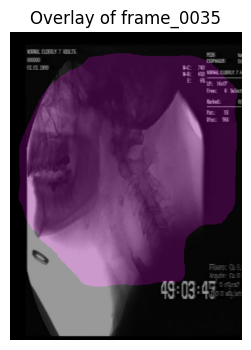

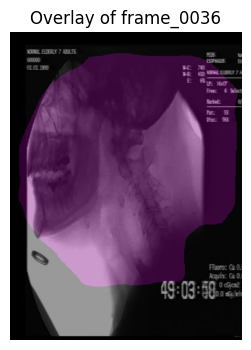

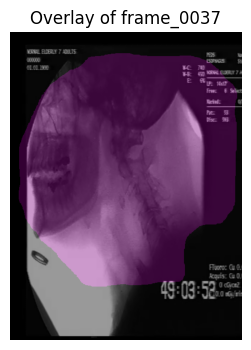

Overlay images saved in output\overlays


In [21]:


video_file = Path("../../../data/foreback/ForeBack/1DHanNE_000.mp4")
mask_file = Path("../../../data/foreback/ForeBack/1DHanNE_000.mask")
output_directory = Path("output")

if not video_file.exists() or not mask_file.exists():
    print("Error: Video or mask file does not exist.")
    exit()

process_video_and_mask(video_file, mask_file, output_directory)

# Example visualization of the first frame and mask
# Example usage
visualize_purple_overlay(
    "output/frames",
    "output/masks",
    "output/overlays",
    alpha=0.4,
    display=True
)
